In [31]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd 
from keras.layers import Dropout
import numpy as np

# Import Data 

In [32]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [33]:
x_train.shape , y_train.shape ,x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
pd.DataFrame(data=x_train[4])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,55,148,210,253,253,113,87,148,55,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,87,232,252,253,189,210,252,252,253,168,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,57,242,252,190,65,5,12,182,252,253,116,0,0,0,0,0,0,0


In [35]:
pd.set_option('max_columns',None)

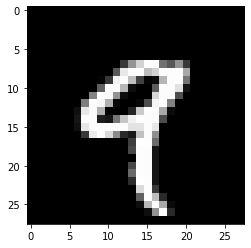

In [36]:
plt.imshow(x_train[4],cmap='gray')
plt.show()

In [37]:
y_train[4]

9

# Build model architecture 

In [38]:
from keras.models import Sequential
from keras.layers import Flatten,Dense


In [39]:
x_train.std()

78.56748998339798

In [40]:
model= Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dropout(0.30))
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(units=10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               117750    
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


# Model Compilation 

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [42]:
x_train=x_train.astype('float')/255
y_train=y_train.astype('float')/255

# Model Training

In [43]:
model_training=model.fit(x=x_train,y=y_train,batch_size=100,epochs=50,validation_split=0.20)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0179 - accuracy: 0.0983 - val_loss: 7.2794e-05 - val_accuracy: 0.0995
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 8.1302e-05 - accuracy: 0.0985 - val_loss: 1.5431e-05 - val_accuracy: 0.0995
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 2.4941e-05 - accuracy: 0.0985 - val_loss: 4.3907e-06 - val_accuracy: 0.0995
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 1.2199e-05 - accuracy: 0.0985 - val_loss: 1.6757e-06 - val_accuracy: 0.0995
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 8.0244e-06 - accuracy: 0.0985 - val_loss: 8.2548e-07 - val_accuracy: 0.0995
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 5.2010e-06 - accuracy: 0.0985 - val_loss: 4.5926e-07 - val_accuracy: 0.0995
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 3.5993e-06 - accuracy: 0.0985 

# Model Performance

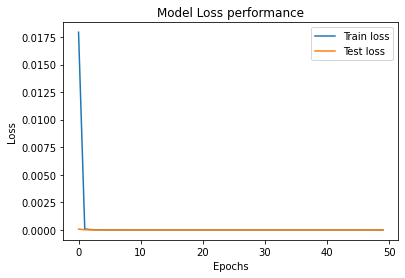

In [44]:
plt.plot(model_training.history['loss'],label ='Train loss')
plt.plot(model_training.history['val_loss'],label ='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss performance')
plt.legend()
plt.show()

# Model Accuracy

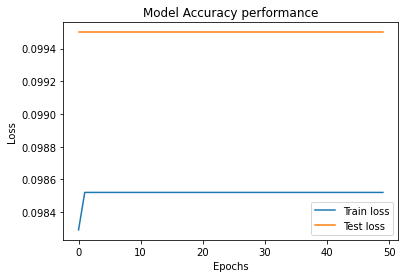

In [45]:
plt.plot(model_training.history['accuracy'],label ='Train loss')
plt.plot(model_training.history['val_accuracy'],label ='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Accuracy performance')
plt.legend()
plt.show()



# Model Evaluation

In [46]:
model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14432.7998 - accuracy: 0.0980


[14432.7998046875, 0.09799999743700027]

# Model Prediction 

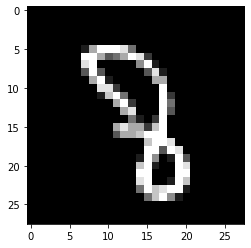

In [25]:
plt.imshow(x_test[543],cmap='gray')
plt.show()


In [26]:
y_predict=model.predict(x_test)

In [27]:
y_predict[543]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
np.argmax(a=y_predict[543])

0